In [13]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'1.0.11'

## what are we doing
- The previous notebook, averaging_by_hand, takes the 10 acquisitions. For the dictionary of accumulations = 1, it calculates the average error and the average splitting for all those rows
- The, if accumulations is 2, that notebook has fitted the data averaging those different counts (like WITEC would do automatically). For all those combined adjacent pairs of rows, we then calculate the mean and standard deviation. and so forth. 

In [14]:
# this function takes in the N rows from averaging the accumulations, and calculates an average for the row.

def average_dict(df_dict):# Initialize an empty list for rows
    rows = []

    # Iterate over the items in the dictionary
    for key, df in df_dict.items():
        
        
        # Extract the Accumulations before '_av' from the key
        parts = key.split('av')[0].split('_')
        # Extract the Accumulations, which should be the last part
        number = int(parts[-1])
        #df_filt=df.loc[df['Diad1_cent_err']]


        # Calculate the mean and standard deviation of splitting, handling NaN values
        mean_value = np.nanmean(df['Split_σ'])
        std_value = np.nanstd(df['Split_σ'])
        #
        mean_pk1_value=np.nanmean(df['Diad1_cent_err'])
        mean_pk1_std=np.nanstd(df['Diad1_cent_err'])

        mean_pk2_value=np.nanmean(df['Diad2_cent_err'])
        mean_pk2_std=np.nanstd(df['Diad2_cent_err'])

        split=np.nanmedian(df['Splitting'])
        Ne_corr_factor_av=0.9977
        Ne_err=2.465495739435719e-06
        

#df_Merge['Corrected_Splitting']=df_Merge['Splitting']*Ne_corr_factor_av

        dens=pf.calculate_density_ucb(corrected_split=df['Splitting']*Ne_corr_factor_av, Ne_pickle_str=None,
 temp='SupCrit', CI_split=0.67, split_err=0, CI_neon=0.67, pref_Ne=Ne_corr_factor_av, Ne_err=Ne_err)
        

        # Append a new row to the list
        rows.append([number, mean_value,std_value, mean_pk1_value, mean_pk1_std, 
                     mean_pk2_value, mean_pk2_std,  split, np.nanmean(dens['Density g/cm3'])])

    # Create a DataFrame from the rows
    summary_df = pd.DataFrame(rows, columns=['Accumulations', 'Mean_Split_σ', 'Std_Split_σ', 
                                             'Mean_pk1_σ', 'Std_pk1_σ', 
                                             'Mean_pk2_σ', 'Std_pk2_σ',
                                             'Split', 'Dens'])
    return summary_df

In [15]:
with open('120s_MP2_100.pkl', 'rb') as file:
    dict_120s_all = pickle.load(file)
summary_df_120s=average_dict(dict_120s_all)

In [16]:
with open('120s_MP2_100.pkl', 'rb') as file:
    dict_120s_all = pickle.load(file)
summary_df_120s=average_dict(dict_120s_all)

with open('45s_MP2_200.pkl', 'rb') as file:
    dict_45s_all = pickle.load(file)
summary_df_45s=average_dict(dict_45s_all)

with open('60s_MP2_200.pkl', 'rb') as file:
    dict_60s_all = pickle.load(file)
summary_df_60s=average_dict(dict_60s_all)

with open('90s_MP2_100.pkl', 'rb') as file:
    dict_90s_all = pickle.load(file)
summary_df_90s=average_dict(dict_90s_all)

## Lets make a pretty plot to show the difference

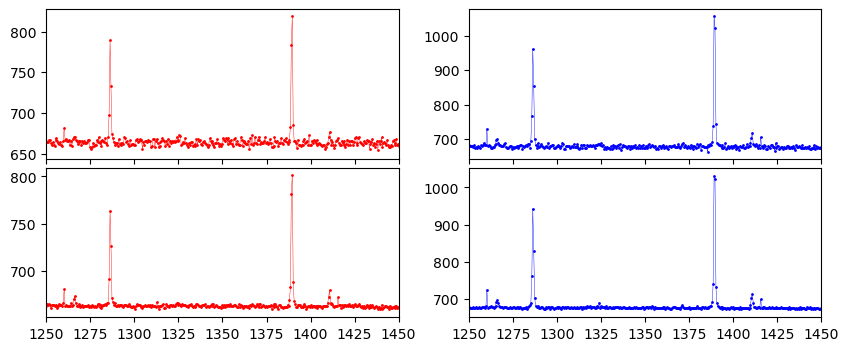

In [17]:
import os
spectra_path=os.getcwd()
files_45=pf.get_data(path=spectra_path,
                       filename='20 MP2_200_MIA_45s.txt', filetype='headless_txt')
files_120=pf.get_data(path=spectra_path,
                       filename='26 MP2_200_MIA_120s.txt', filetype='headless_txt')


files_45 = np.delete(files_45, 1, axis=1)
files_120 = np.delete(files_120, 1, axis=1)

# files = np.delete(files, 5, axis=1)
fig, ((ax1, ax0), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10,4), sharex=True)
ms=2
for i in range(7, 8):
    l=i*1000
    
    ax1.plot(files_45[:, 0], files_45[:, i+1], '.-r', lw=0.3, ms=ms)
    ax0.plot(files_120[:, 0], files_120[:, i+1], '.-b', lw=0.3, ms=ms)

    # Averages
    j=1
    n=10
    y_mean_45 = np.mean(files_45[:, j+1:j+n+1], axis=1)
    y_mean_120 = np.mean(files_120[:, j+1:j+n+1], axis=1)

    ax2.plot(files_45[:, 0], y_mean_45, '.-r', lw=0.3, ms=ms)
    ax3.plot(files_120[:, 0], y_mean_120, '.-b', lw=0.3, ms=ms)
#test=np.column_stack((files[:, 0], files[:, 1]))
ax1.set_xlim([1250, 1450])
## Now lets plot averages
fig.subplots_adjust(wspace=0.2, hspace=0.06)


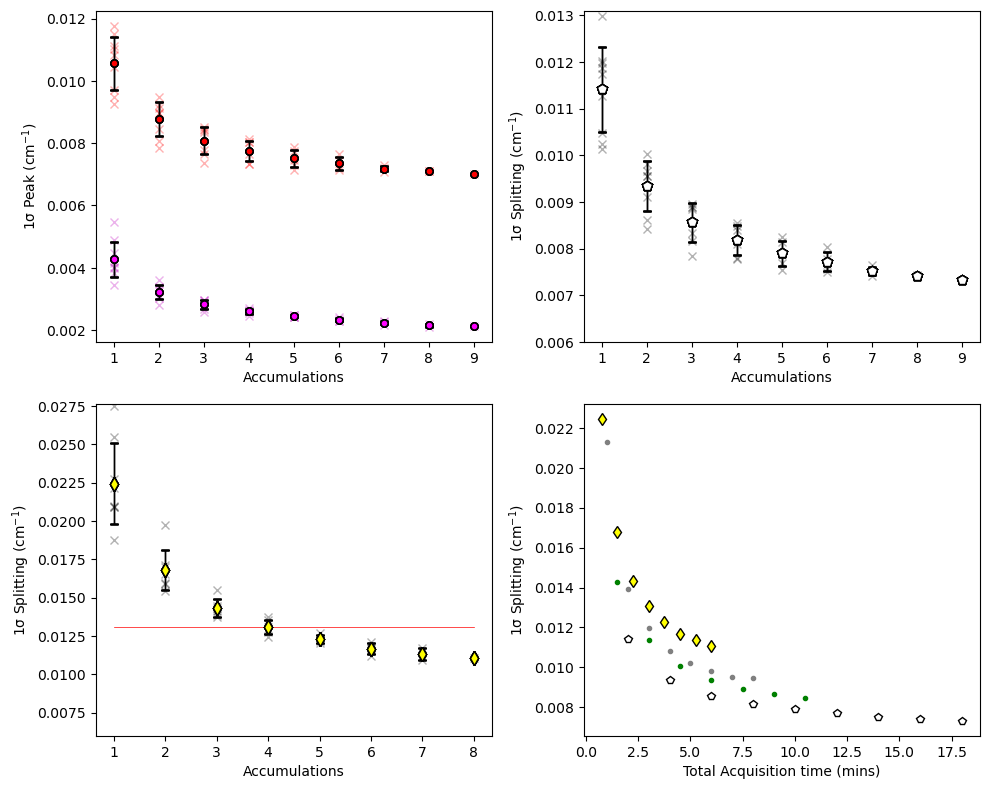

In [18]:
fig, ((ax3, ax2), (ax1, ax4)) = plt.subplots(2, 2, figsize=(10,8))
# Loop over different dictionaries
df_dict=dict_45s_all
for key, df in df_dict.items():
    parts = key.split('av')[0].split('_')
    # Extract the number, which should be the last part
    number = int(parts[-1])
    

    ax1.plot(number+0*df['Split_σ'], df['Split_σ'], 'xk', alpha=0.3)
summary_df=summary_df_45s
for i in range(len(summary_df)):
    
    ax1.errorbar(summary_df['Accumulations'], summary_df['Mean_Split_σ'], xerr=0, yerr=summary_df['Std_Split_σ'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='yellow', ms=7, mec='k', capsize=3)



df_dict=dict_120s_all
for key, df in df_dict.items():
    parts = key.split('av')[0].split('_')
    # Extract the number, which should be the last part
    number = int(parts[-1])
    

    ax2.plot(number+0*df['Split_σ'], df['Split_σ'], 'xk', alpha=0.3)
    ax3.plot(number+0*df['Diad1_cent_err'], df['Diad1_cent_err'], 'xr', alpha=0.3)
    ax3.plot(number+0*df['Diad2_cent_err'], df['Diad2_cent_err'], 'xm', alpha=0.3)
summary_df=summary_df_120s
for i in range(len(summary_df)):
    
    ax2.errorbar(summary_df['Accumulations'], summary_df['Mean_Split_σ'], xerr=0, yerr=summary_df['Std_Split_σ'],
             fmt='p', ecolor='k', elinewidth=0.8, mfc='white', ms=7, mec='k', capsize=3)
    ax3.errorbar(summary_df['Accumulations'], summary_df['Mean_pk1_σ'], xerr=0, yerr=summary_df['Std_pk1_σ'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3)
    ax3.errorbar(summary_df['Accumulations'], summary_df['Mean_pk2_σ'], xerr=0, yerr=summary_df['Std_pk2_σ'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='magenta', ms=5, mec='k', capsize=3)

ax2.set_ylim([0.006, 0.0131])
ax1.set_ylim([0.006, 0.0276])
ax1.plot([1, 8], [0.0131, 0.0131], '-r' , lw=0.5)

# Lets do it peak by peak



# Lets show as a function of acquisitoin time

ax4.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_Split_σ'], 'pk', mfc='white', label='120s')
ax4.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_Split_σ'], '.g', label='90s')
ax4.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_Split_σ'], '.', color='grey', label='60s')
ax4.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_Split_σ'], 'dk', mfc='yellow', label='45s')

# plt.ylabel('Sigma (cm-1)')
# plt.xlabel('Time (mins)')
# plt.plot([(45*3)/60, (45*3)/60], [0.008, 0.022], '-r')
# plt.plot([3*(45*3)/60, 3*(45*3)/60], [0.008, 0.022], '-r')

ax3.set_ylabel('1σ Peak (cm$^{-1})$')
ax2.set_ylabel('1σ Splitting (cm$^{-1})$')
ax4.set_ylabel('1σ Splitting (cm$^{-1})$')
ax1.set_ylabel('1σ Splitting (cm$^{-1})$')

ax1.set_xlabel('Accumulations')
ax2.set_xlabel('Accumulations')
ax3.set_xlabel('Accumulations')
ax4.set_xlabel('Total Acquisition time (mins)')
fig.tight_layout()
fig.savefig('Different_Acq_settings.png', dpi=200)
 

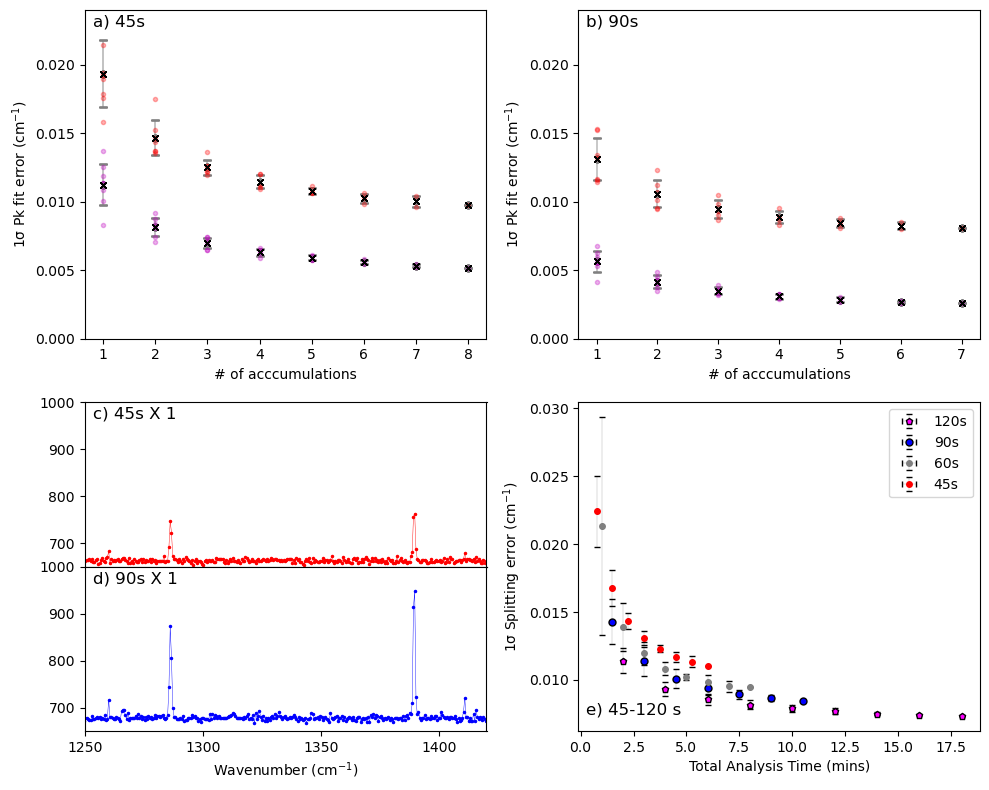

In [19]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)

# Create subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
# Create a new grid for the third position
inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1, 0], hspace=0)
ax3a = fig.add_subplot(inner_grid[0])
ax3b = fig.add_subplot(inner_grid[1])
ax4 = fig.add_subplot(gs[1, 1])

# Loop over different dictionaries
df_dict=dict_45s_all

# This is the average of all the accumulations
ax1.annotate("a) 45s", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
summary_df=summary_df_45s

for i in range(len(summary_df)):
    
    
  

    # ax1.errorbar(summary_df['Accumulations'], summary_df['Mean_Split_σ'], xerr=0, yerr=0*summary_df['Std_Split_σ'],
    #          fmt='p', ecolor='k', elinewidth=0.1, mfc='white', ms=5, mec='k', capsize=2)
    ax1.errorbar(summary_df['Accumulations'], summary_df['Mean_pk1_σ'], xerr=0, yerr=summary_df['Std_pk1_σ'],
             fmt='x', ecolor='grey', elinewidth=0.1, mfc='red', ms=4, mec='k', capsize=3)
    ax1.errorbar(summary_df['Accumulations'], summary_df['Mean_pk2_σ'], xerr=0, yerr=summary_df['Std_pk2_σ'],
             fmt='x', ecolor='grey', elinewidth=0.1, mfc='magenta', ms=4, mec='k', capsize=3)
    
df_dict=dict_45s_all
for key, df in df_dict.items():
    parts = key.split('av')[0].split('_')
    # Extract the number, which should be the last part
    number = int(parts[-1])
    

    #ax1.plot(number+0*df['Split_σ'], df['Split_σ'], '.k', alpha=0.3)
    ax1.plot(number+0*df['Diad1_cent_err'], df['Diad1_cent_err'], '.r', alpha=0.3)
    ax1.plot(number+0*df['Diad2_cent_err'], df['Diad2_cent_err'], '.m', alpha=0.3)


#This plots the individual accumulations
    


ax2.annotate("b) 90s", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
summary_df=summary_df_90s

for i in range(len(summary_df)):
    
   
  

    # ax2.errorbar(summary_df['Accumulations'], summary_df['Mean_Split_σ'], xerr=0, yerr=0*summary_df['Std_Split_σ'],
    #          fmt='p', ecolor='k', elinewidth=0.1, mfc='white', ms=5, mec='k', capsize=2)
    ax2.errorbar(summary_df['Accumulations'], summary_df['Mean_pk1_σ'], xerr=0, yerr=summary_df['Std_pk1_σ'],
             fmt='x', ecolor='grey', elinewidth=0.1, mfc='red', ms=4, mec='k', capsize=3)
    ax2.errorbar(summary_df['Accumulations'], summary_df['Mean_pk2_σ'], xerr=0, yerr=summary_df['Std_pk2_σ'],
             fmt='x', ecolor='grey', elinewidth=0.1, mfc='magenta', ms=4, mec='k', capsize=3)
    
df_dict=dict_90s_all
for key, df in df_dict.items():
    parts = key.split('av')[0].split('_')
    # Extract the number, which should be the last part
    number = int(parts[-1])
    

    #ax2.plot(number+0*df['Split_σ'], df['Split_σ'], '.k', alpha=0.3)
    ax2.plot(number+0*df['Diad1_cent_err'], df['Diad1_cent_err'], '.r', alpha=0.3)
    ax2.plot(number+0*df['Diad2_cent_err'], df['Diad2_cent_err'], '.m', alpha=0.3)

ax1.set_ylabel('1σ Pk fit error (cm$^{-1})$')
ax2.set_ylabel('1σ Pk fit error (cm$^{-1})$')
#ax2.set_ylabel('1σ Splitting (cm$^{-1})$')

#This plots the individual accumulations
import os
spectra_path=os.getcwd()
files_45=pf.get_data(path=spectra_path,
                       filename='20 MP2_200_MIA_45s.txt', filetype='headless_txt')
files_120=pf.get_data(path=spectra_path,
                       filename='24 MP2_200_MIA_90s.txt', filetype='headless_txt')


files_45 = np.delete(files_45, 1, axis=1)
files_120 = np.delete(files_120, 1, axis=1)

# files = np.delete(files, 5, axis=1)
ms=3
ax3a.annotate("c) 45s X 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=12)
ax3b.annotate("d) 90s X 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=12)
for i in range(1, 2):
    l=i*1000
    
    ax3a.plot(files_45[:, 0], files_45[:, i+1], '.-r', lw=0.3, ms=ms)
    ax3b.plot(files_120[:, 0], files_120[:, i+1], '.-b', lw=0.3, ms=ms)

    # Averages
    j=0
    n=6
    y_mean_45 = np.mean(files_45[:, j+1:j+n+1], axis=1)
    y_mean_120 = np.mean(files_120[:, j+1:j+n+1], axis=1)


#test=np.column_stack((files[:, 0], files[:, 1]))
ax3a.set_ylim([650, 1000])
ax3b.set_ylim([650, 1000])
ax3a.set_xlim([1250, 1420])
ax3b.set_xlim([1250, 1420])
## Now lets plot averages
ax1.set_ylim([0, 0.024])
ax2.set_ylim([0, 0.024])

# Now lets plot the error on splitting for all of them

# ax4.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_Split_σ'], 'pk', mfc='white', label='120s')
# ax4.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_Split_σ'], 'o', mfc='blue', label='90s')
# ax4.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_Split_σ'], '.', color='grey', label='60s')
# ax4.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_Split_σ'], 'dk', mfc='red', label='45s')

# 
caps=2
ax4.errorbar((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_Split_σ'], xerr=0, yerr=summary_df_120s['Std_Split_σ'],
             fmt='p', ecolor='k', elinewidth=0.1, mfc='magenta', ms=5, mec='k', capsize=caps, label='120s')


ax4.errorbar((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_Split_σ'], xerr=0, yerr=summary_df_90s['Std_Split_σ'],
             fmt='o', ecolor='k', elinewidth=0.1, mfc='blue', ms=5, mec='k', capsize=caps, label='90s')

ax4.errorbar((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_Split_σ'], xerr=0, yerr=summary_df_60s['Std_Split_σ'],
             fmt='o', ecolor='k', elinewidth=0.1, mfc='grey', ms=5, mec='None', capsize=caps, label='60s')

ax4.errorbar((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_Split_σ'], xerr=0, yerr=summary_df_45s['Std_Split_σ'],
             fmt='o', ecolor='k', elinewidth=0.1, mfc='red', ms=5, lw=2, mec='None', capsize=caps, label='45s')

ax4.annotate("e) 45-120 s", xy=(0.02, 0.05), xycoords="axes fraction", fontsize=12)
ax4.legend()


ax3a.set_xticks([])
ax3b.set_xticks([1250, 1300, 1350, 1400])
ax3b.set_xlabel('Wavenumber (cm$^{-1}$)')
ax1.set_xlabel('# of acccumulations')
ax2.set_xlabel('# of acccumulations')
ax4.set_ylabel('1σ Splitting error (cm$^{-1})$')
ax4.set_xlabel('Total Analysis Time (mins)')
fig.tight_layout()
fig.savefig('AlexMI_errors_python.png', dpi=200)

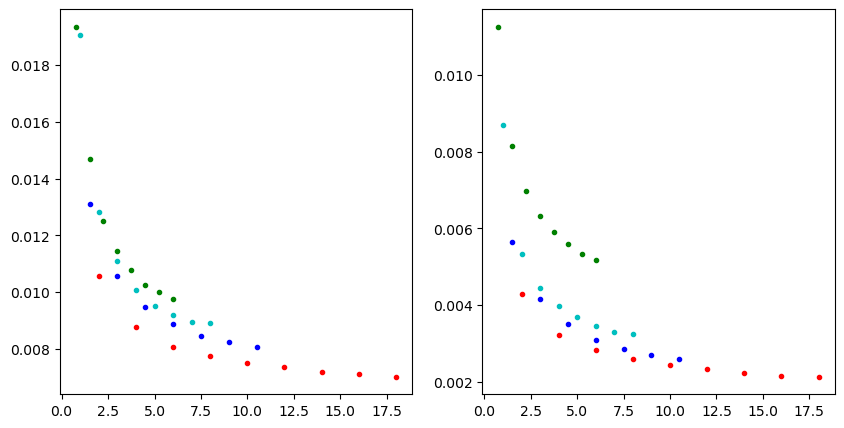

In [20]:
# Lets plot it for each peak individually
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_pk1_σ'], '.r', label='120s')
ax1.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_pk1_σ'], '.b', label='90s')
ax1.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_pk1_σ'], '.c', label='60s')
ax1.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_pk1_σ'], '.g', label='45s')

ax2.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_pk2_σ'], '.r', label='120s')
ax2.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_pk2_σ'], '.b', label='90s')
ax2.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_pk2_σ'], '.c', label='60s')
ax2.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_pk2_σ'], '.g', label='45s')

Text(0.5, 0, 'Number acquisitions')

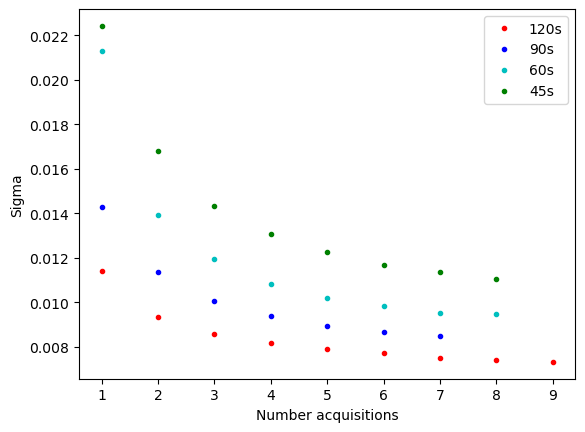

In [21]:

Pf120 = np.poly1d(np.polyfit(summary_df_120s['Accumulations'], summary_df_120s['Mean_Split_σ'],
                          5))
Px = np.linspace(1, 9, 101)
Py120 = Pf120(Px)
#plt.plot(Px, Py120, '-r')

# Pf90= np.poly1d(np.polyfit(summary_df_90s['Accumulations'], summary_df_90s['Mean_Split_σ'],
#                           3))
# Px90 = np.linspace(1, 6, 101)
# Py90 = Pf90(Px)
# plt.plot(Px, Py120, '-r')
# plt.plot(Px90, Py90, '-b')
plt.plot(summary_df_120s['Accumulations'], summary_df_120s['Mean_Split_σ'], '.r', label='120s')
plt.plot(summary_df_90s['Accumulations'], summary_df_90s['Mean_Split_σ'], '.b', label='90s')
plt.plot(summary_df_60s['Accumulations'], summary_df_60s['Mean_Split_σ'], '.c', label='60s')
plt.plot(summary_df_45s['Accumulations'], summary_df_45s['Mean_Split_σ'], '.g', label='45s')
plt.legend()
plt.ylabel('Sigma')
plt.xlabel('Number acquisitions')

In [22]:
summary_df_120s

,Accumulations,Mean_Split_σ,Std_Split_σ,Mean_pk1_σ,Std_pk1_σ,Mean_pk2_σ,Std_pk2_σ,Split,Dens
0,1,0.011412,0.000904,0.010569,0.000853,0.004277,0.000566,103.075429,0.037264
1,2,0.009343,0.000536,0.008765,0.000543,0.003223,0.000232,103.083403,0.037822
2,3,0.008562,0.000415,0.008080,0.000432,0.002827,0.000140,103.081602,0.037997
3,4,0.008183,0.000315,0.007755,0.000330,0.002607,0.000078,103.083289,0.037921
4,5,0.007900,0.000268,0.007510,0.000280,0.002450,0.000027,103.082178,0.037715
5,6,0.007716,0.000206,0.007353,0.000204,0.002339,0.000056,103.081905,0.037965
6,7,0.007525,0.000090,0.007184,0.000088,0.002239,0.000050,103.084384,0.038135
7,8,0.007420,0.000024,0.007100,0.000010,0.002155,0.000050,103.083085,0.037936
8,9,0.007330,0.000000,0.007013,0.000000,0.002132,0.000000,103.081865,0.037453


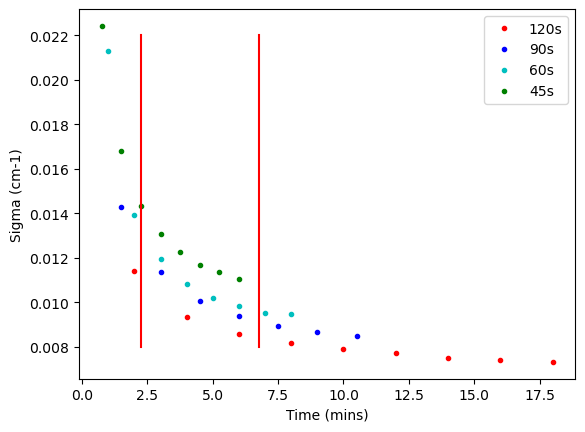

In [23]:

Pf120 = np.poly1d(np.polyfit(summary_df_120s['Accumulations'], summary_df_120s['Mean_Split_σ'],
                          5))
Px = np.linspace(1, 9, 101)
Py120 = Pf120(Px)
#plt.plot(Px, Py120, '-r')

# Pf90= np.poly1d(np.polyfit(summary_df_90s['Accumulations'], summary_df_90s['Mean_Split_σ'],
#                           3))
# Px90 = np.linspace(1, 6, 101)
# Py90 = Pf90(Px)
# plt.plot(Px, Py120, '-r')
# plt.plot(Px90, Py90, '-b')
plt.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_Split_σ'], '.r', label='120s')
plt.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_Split_σ'], '.b', label='90s')
plt.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_Split_σ'], '.c', label='60s')
plt.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_Split_σ'], '.g', label='45s')
plt.legend()
plt.ylabel('Sigma (cm-1)')
plt.xlabel('Time (mins)')
plt.plot([(45*3)/60, (45*3)/60], [0.008, 0.022], '-r')
plt.plot([3*(45*3)/60, 3*(45*3)/60], [0.008, 0.022], '-r')

In [24]:
summary_df_120s

,Accumulations,Mean_Split_σ,Std_Split_σ,Mean_pk1_σ,Std_pk1_σ,Mean_pk2_σ,Std_pk2_σ,Split,Dens
0,1,0.011412,0.000904,0.010569,0.000853,0.004277,0.000566,103.075429,0.037264
1,2,0.009343,0.000536,0.008765,0.000543,0.003223,0.000232,103.083403,0.037822
2,3,0.008562,0.000415,0.008080,0.000432,0.002827,0.000140,103.081602,0.037997
3,4,0.008183,0.000315,0.007755,0.000330,0.002607,0.000078,103.083289,0.037921
4,5,0.007900,0.000268,0.007510,0.000280,0.002450,0.000027,103.082178,0.037715
5,6,0.007716,0.000206,0.007353,0.000204,0.002339,0.000056,103.081905,0.037965
6,7,0.007525,0.000090,0.007184,0.000088,0.002239,0.000050,103.084384,0.038135
7,8,0.007420,0.000024,0.007100,0.000010,0.002155,0.000050,103.083085,0.037936
8,9,0.007330,0.000000,0.007013,0.000000,0.002132,0.000000,103.081865,0.037453


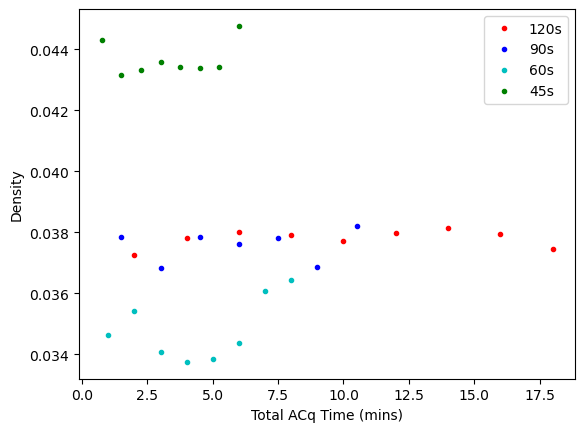

In [25]:



Pf120 = np.poly1d(np.polyfit(summary_df_120s['Accumulations'], summary_df_120s['Mean_Split_σ'],
                          5))
Px = np.linspace(1, 9, 101)
Py120 = Pf120(Px)
#plt.plot(Px, Py120, '-r')

# Pf90= np.poly1d(np.polyfit(summary_df_90s['Accumulations'], summary_df_90s['Mean_Split_σ'],
#                           3))
# Px90 = np.linspace(1, 6, 101)
# Py90 = Pf90(Px)
# plt.plot(Px, Py120, '-r')
# plt.plot(Px90, Py90, '-b')
plt.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Dens'], '.r', label='120s')
plt.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Dens'], '.b', label='90s')
plt.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Dens'], '.c', label='60s')
plt.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Dens'], '.g', label='45s')
plt.legend()
plt.ylabel('Density')
plt.xlabel('Total ACq Time (mins)')
plt.ticklabel_format(useOffset=False)
# plt.plot([(45*3)/60, (45*3)/60], [0.008, 0.022], '-r')
# plt.plot([3*(45*3)/60, 3*(45*3)/60], [0.008, 0.022], '-r')

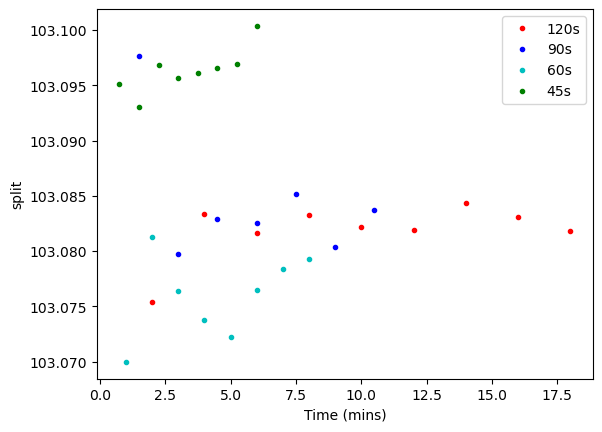

In [26]:

Pf120 = np.poly1d(np.polyfit(summary_df_120s['Accumulations'], summary_df_120s['Mean_Split_σ'],
                          5))
Px = np.linspace(1, 9, 101)
Py120 = Pf120(Px)
#plt.plot(Px, Py120, '-r')

# Pf90= np.poly1d(np.polyfit(summary_df_90s['Accumulations'], summary_df_90s['Mean_Split_σ'],
#                           3))
# Px90 = np.linspace(1, 6, 101)
# Py90 = Pf90(Px)
# plt.plot(Px, Py120, '-r')
# plt.plot(Px90, Py90, '-b')
plt.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Split'], '.r', label='120s')
plt.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Split'], '.b', label='90s')
plt.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Split'], '.c', label='60s')
plt.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Split'], '.g', label='45s')
plt.legend()
plt.ylabel('split')
plt.xlabel('Time (mins)')
plt.ticklabel_format(useOffset=False)
# plt.plot([(45*3)/60, (45*3)/60], [0.008, 0.022], '-r')
# plt.plot([3*(45*3)/60, 3*(45*3)/60], [0.008, 0.022], '-r')

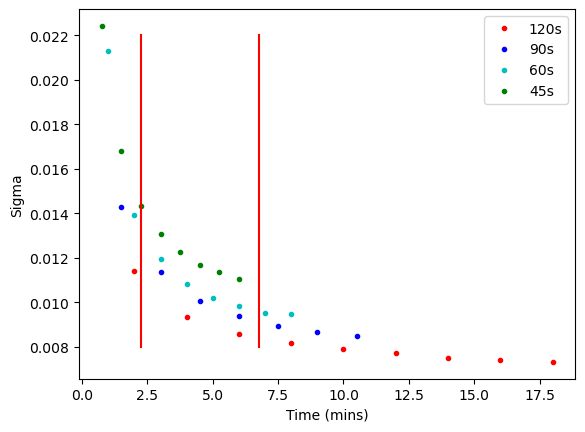

In [27]:

Pf120 = np.poly1d(np.polyfit(summary_df_120s['Accumulations'], summary_df_120s['Mean_Split_σ'],
                          5))
Px = np.linspace(1, 9, 101)
Py120 = Pf120(Px)
#plt.plot(Px, Py120, '-r')

# Pf90= np.poly1d(np.polyfit(summary_df_90s['Accumulations'], summary_df_90s['Mean_Split_σ'],
#                           3))
# Px90 = np.linspace(1, 6, 101)
# Py90 = Pf90(Px)
# plt.plot(Px, Py120, '-r')
# plt.plot(Px90, Py90, '-b')
plt.plot((1/60)*summary_df_120s['Accumulations']*120, summary_df_120s['Mean_Split_σ'], '.r', label='120s')
plt.plot((1/60)*summary_df_90s['Accumulations']*90, summary_df_90s['Mean_Split_σ'], '.b', label='90s')
plt.plot((1/60)*summary_df_60s['Accumulations']*60, summary_df_60s['Mean_Split_σ'], '.c', label='60s')
plt.plot((1/60)*summary_df_45s['Accumulations']*45, summary_df_45s['Mean_Split_σ'], '.g', label='45s')
plt.legend()
plt.ylabel('Sigma')
plt.xlabel('Time (mins)')
plt.plot([(45*3)/60, (45*3)/60], [0.008, 0.022], '-r')
plt.plot([3*(45*3)/60, 3*(45*3)/60], [0.008, 0.022], '-r')

In [28]:
summary_df_120s

,Accumulations,Mean_Split_σ,Std_Split_σ,Mean_pk1_σ,Std_pk1_σ,Mean_pk2_σ,Std_pk2_σ,Split,Dens
0,1,0.011412,0.000904,0.010569,0.000853,0.004277,0.000566,103.075429,0.037264
1,2,0.009343,0.000536,0.008765,0.000543,0.003223,0.000232,103.083403,0.037822
2,3,0.008562,0.000415,0.008080,0.000432,0.002827,0.000140,103.081602,0.037997
3,4,0.008183,0.000315,0.007755,0.000330,0.002607,0.000078,103.083289,0.037921
4,5,0.007900,0.000268,0.007510,0.000280,0.002450,0.000027,103.082178,0.037715
5,6,0.007716,0.000206,0.007353,0.000204,0.002339,0.000056,103.081905,0.037965
6,7,0.007525,0.000090,0.007184,0.000088,0.002239,0.000050,103.084384,0.038135
7,8,0.007420,0.000024,0.007100,0.000010,0.002155,0.000050,103.083085,0.037936
8,9,0.007330,0.000000,0.007013,0.000000,0.002132,0.000000,103.081865,0.037453


1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7


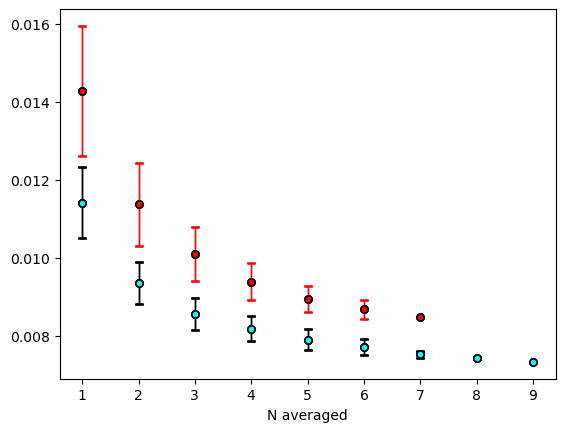

In [29]:
df_dict=dict_120s_all
summary_df=summary_df_120s
for key, df in df_dict.items():
    parts = key.split('av')[0].split('_')
    # Extract the number, which should be the last part
    number = int(parts[-1])
    print(number)

    #plt.plot(number+0*df['Split_σ'], df['Split_σ'], 'xk', alpha=0.3)
for i in range(len(summary_df)):
    
    plt.errorbar(summary_df['Accumulations'], summary_df['Mean_Split_σ'], xerr=0, yerr=summary_df['Std_Split_σ'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3)
    plt.xlabel('Number averaged')
    plt.xlabel('N averaged')


df_dict=dict_90s_all
summary_df=summary_df_90s
for key, df in df_dict.items():
    parts = key.split('av')[0].split('_')
    # Extract the number, which should be the last part
    number = int(parts[-1])
    print(number)

    #plt.plot(number+0*df['Split_σ'], df['Split_σ'], 'xk', alpha=0.3)
for i in range(len(summary_df)):
    
    plt.errorbar(summary_df['Accumulations'], summary_df['Mean_Split_σ'], xerr=0, yerr=summary_df['Std_Split_σ'],
             fmt='o', ecolor='r', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3)
    plt.xlabel('Number averaged')
    plt.xlabel('N averaged')   